# 911 Calls Capstone Project

In [1]:
import numpy as np
import pandas as pd


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
df=pd.read_excel('911.xlsx',sheet_name='911')
df.head()


,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null datetime64[ns]
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 6.8+ MB


In [5]:
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [6]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [7]:
df['twp'].value_counts().head()


LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [8]:
len(df['title'].unique())

110

In [9]:
df['Reason']=df['title'].apply(lambda title:title.split(':')[0])

In [10]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

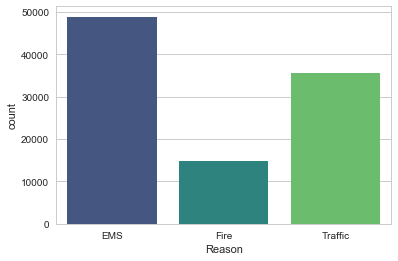

In [11]:

sns.countplot(x='Reason',data=df,palette='viridis')


In [12]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslib.Timestamp

In [13]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [14]:

df['Hour']=df['timeStamp'].apply(lambda time : time.hour)
df['Month']=df['timeStamp'].apply(lambda time: time.month)
df['Day of the week']=df['timeStamp'].apply(lambda time: time.dayofweek)


In [15]:
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of the week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


In [16]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [17]:
df['Day of the week']=df['Day of the week'].map(dmap)

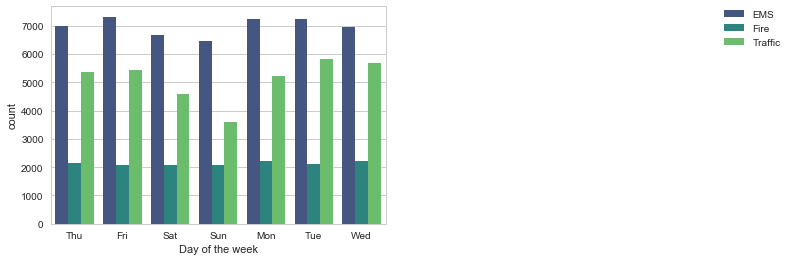

In [18]:
sns.countplot(x=df['Day of the week'],data=df,hue='Reason',palette='viridis')

plt.legend(bbox_to_anchor=(2, 1), loc=2, borderaxespad=0)


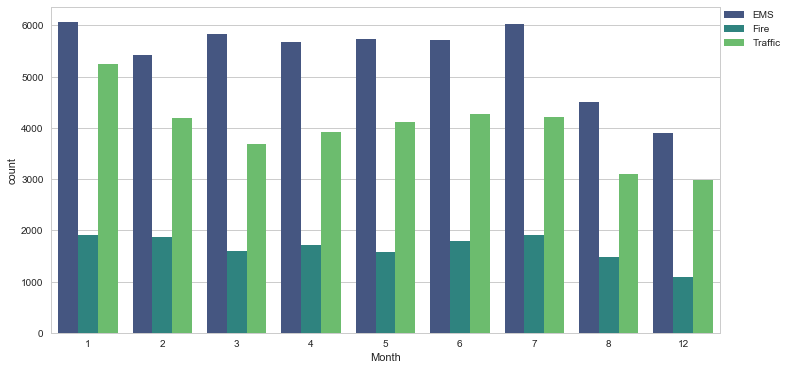

In [19]:
plt.figure(figsize=(12,6))
sns.countplot(x='Month',data=df,hue='Reason',palette='viridis')

# To relocate the legend
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)



In [20]:
bymonth=df.groupby(by='Month').count()
bymonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of the week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


In [21]:
bymonth=df.groupby(by='Month').count()
bymonth.head(13)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of the week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


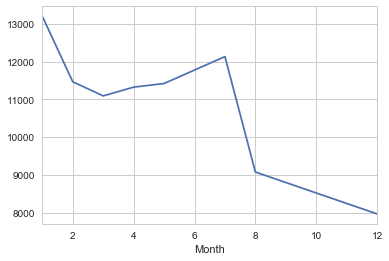

In [22]:
bymonth['twp'].plot()


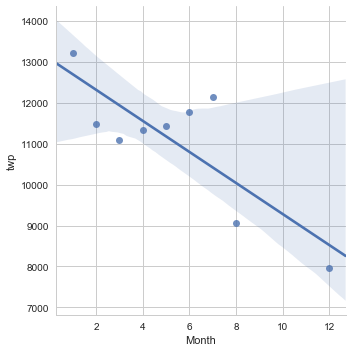

In [23]:
sns.lmplot(x='Month',y='twp',data=bymonth.reset_index())


In [24]:
df['Date']=df['timeStamp'].apply(lambda t :t.date())

In [25]:
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of the week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


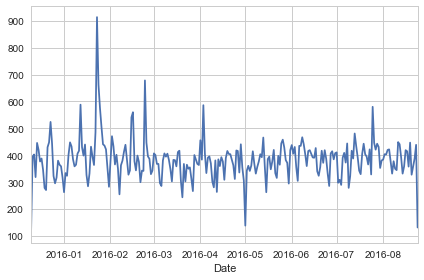

In [26]:
df.groupby('Date').count()['twp'].plot()
plt.tight_layout( )

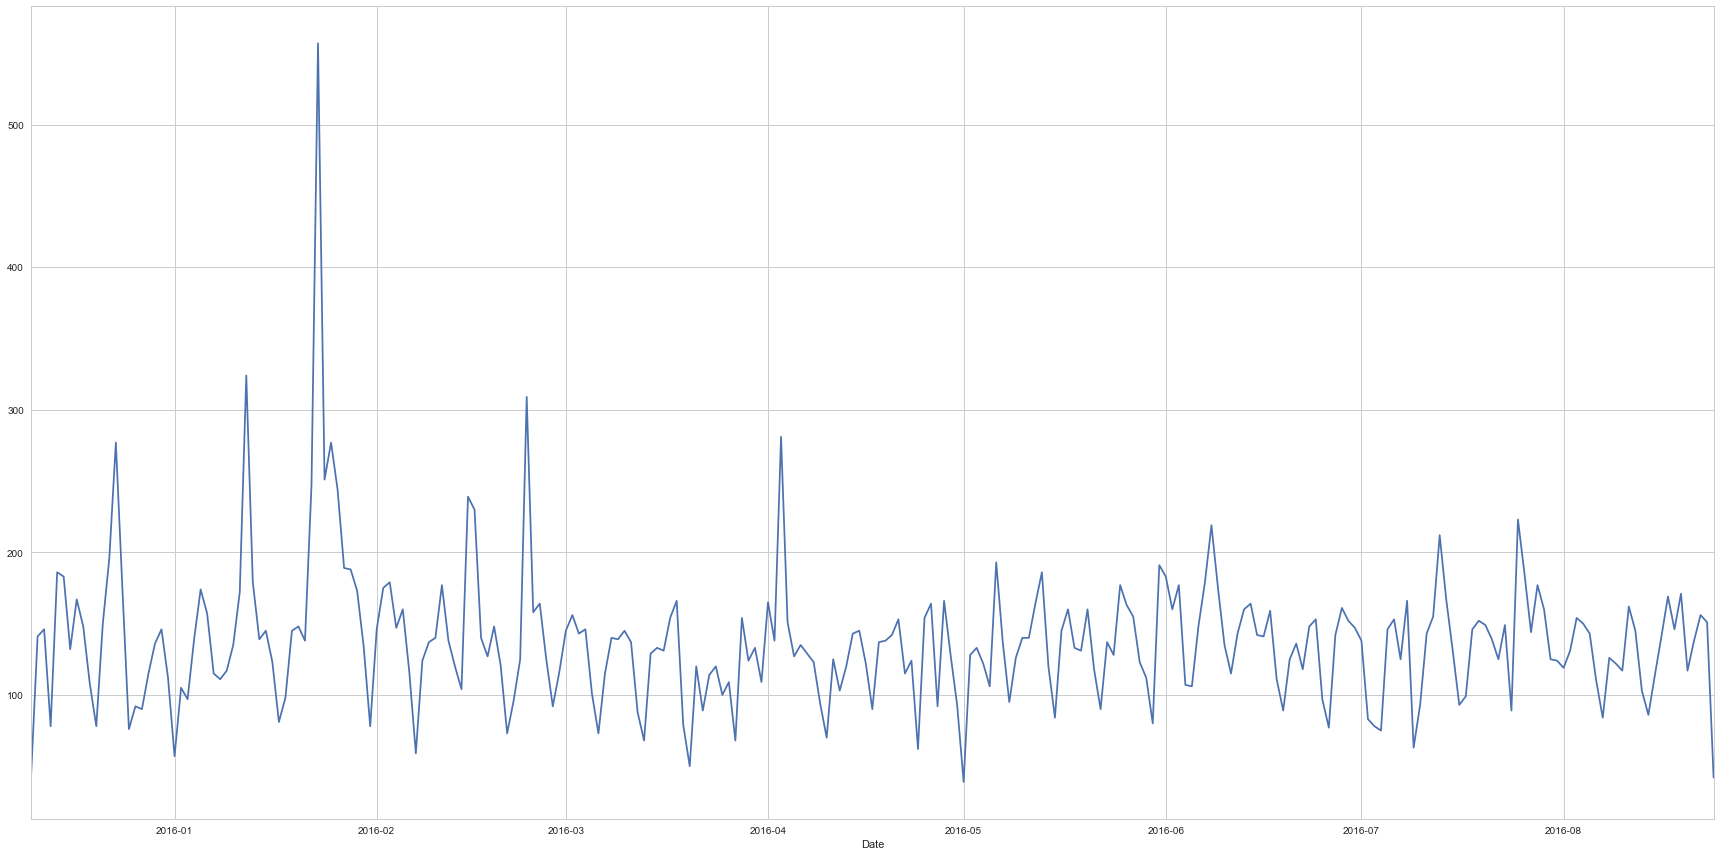

In [27]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot(figsize=(24,12))
plt.tight_layout()

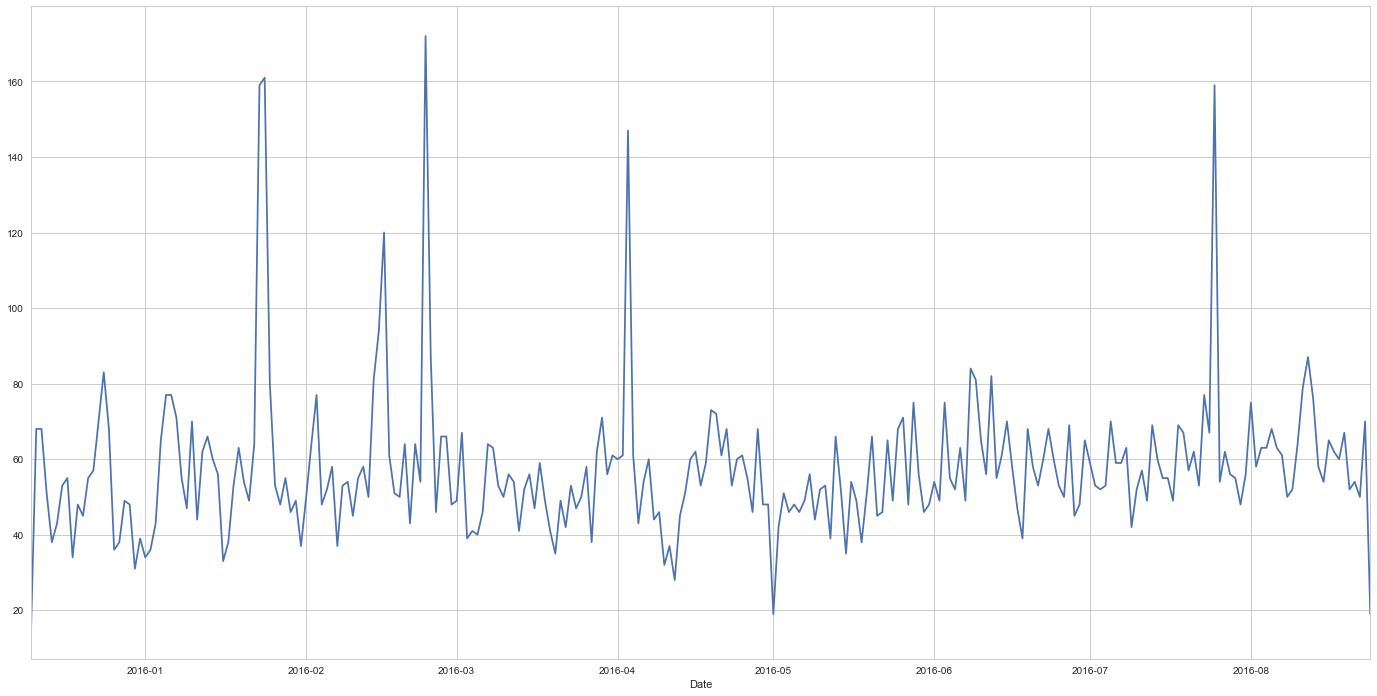

In [28]:
plt.figure(figsize=(24,12))
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()

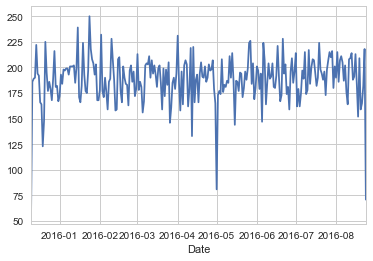

In [29]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()

In [30]:
dayhour=df.groupby(by=['Day of the week','Hour']).count()['Reason'].unstack()
dayhour.head(5)


Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of the week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


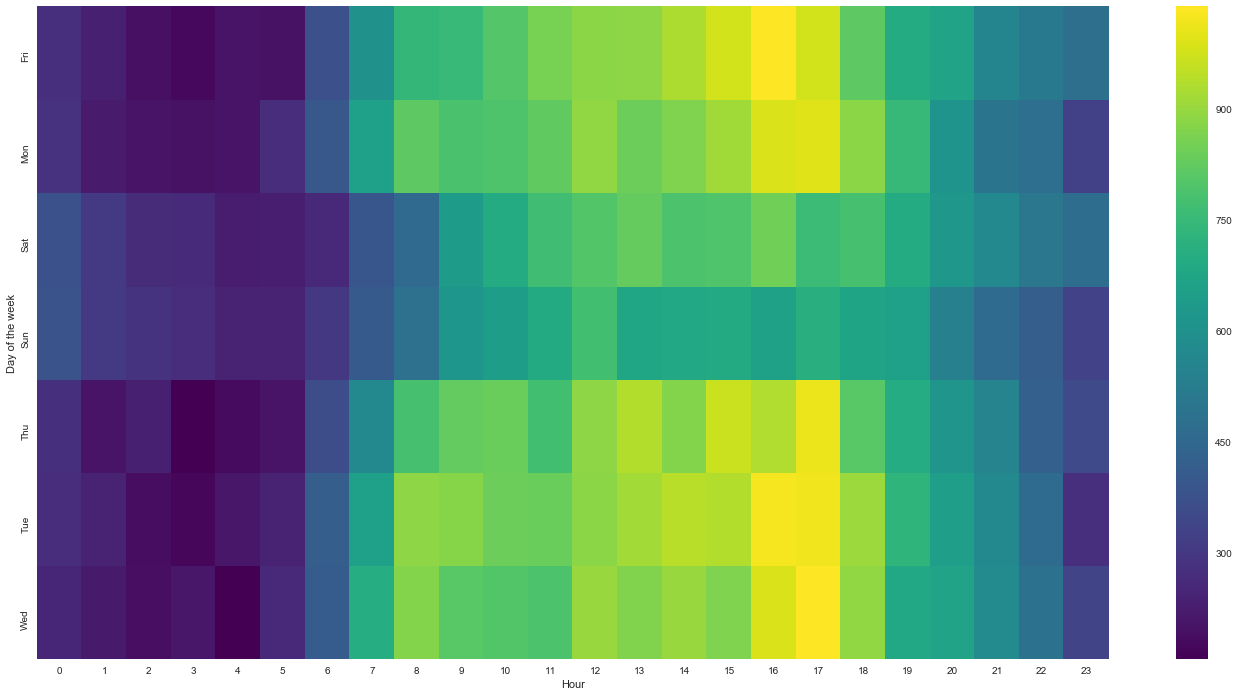

In [31]:
plt.figure(figsize=(24,12))
sns.heatmap(dayhour,cmap='viridis')

C:\Users\Shekhar\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


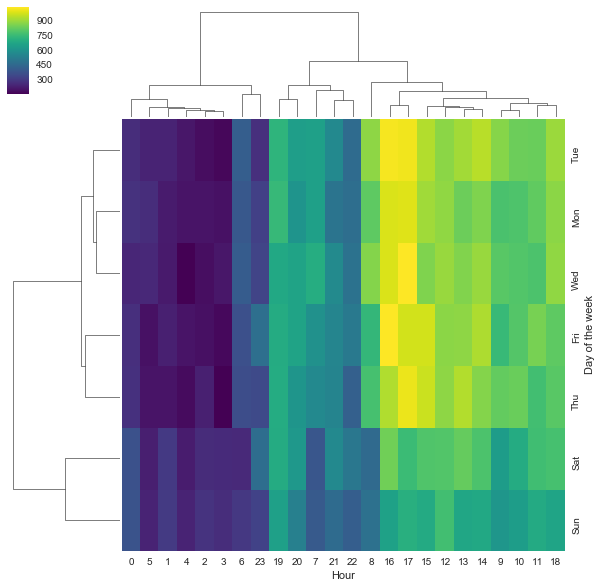

In [32]:
sns.clustermap(dayhour,cmap='viridis')

In [33]:
monthhour=df.groupby(by=['Month','Hour']).count()['Reason'].unstack()
monthhour.head(5)


Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Month,,,,,,,,,,,,,,,,,,,,,
1,294,218,225,205,205,214,386,551,755,752,...,775,691,725,871,798,687,592,507,421,345
2,267,194,161,149,161,213,325,550,597,603,...,648,704,692,674,693,578,518,453,426,327
3,214,181,194,149,152,181,291,487,556,614,...,672,707,782,676,600,547,493,402,359,273
4,243,204,170,161,179,178,316,482,613,598,...,705,728,767,728,646,533,472,377,309,282
5,255,195,158,173,160,196,254,439,605,644,...,640,746,728,787,608,510,489,462,405,283


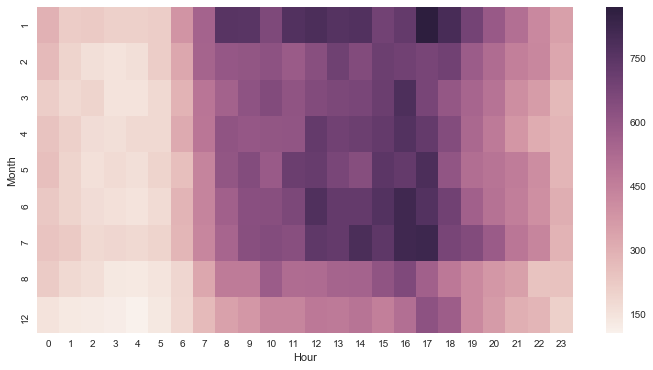

In [34]:
plt.figure(figsize=(12,6))
sns.heatmap(monthhour)

C:\Users\Shekhar\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


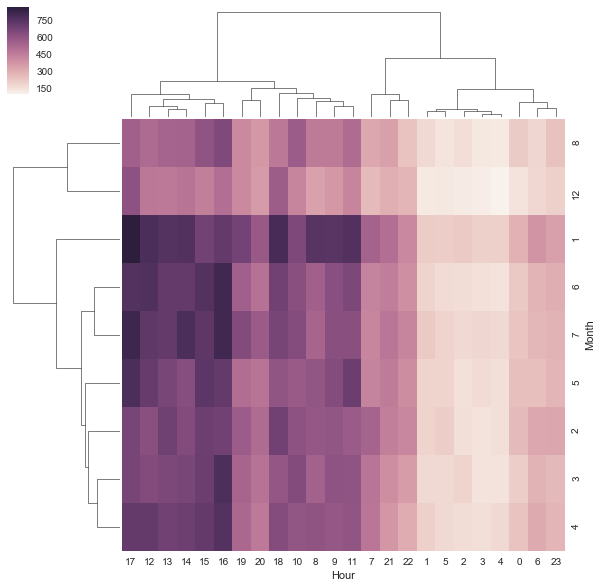

In [35]:
sns.clustermap(monthhour)

In [36]:
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of the week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


In [37]:
hghtwp=df['lat'].value_counts(5).head(5)

In [38]:
hghtwp


40.097222    0.014986
40.229008    0.010111
40.133037    0.009428
40.024967    0.009096
40.172314    0.005237
Name: lat, dtype: float64

In [39]:
df[(df['twp']=='NEW HANOVER') & (df['Reason']=='EMS')][['lat','lng']].head(5)

,lat,lng
0,40.297876,-75.581294
17,40.312181,-75.574260
82,40.290693,-75.576661
100,40.284455,-75.574528
509,40.337955,-75.569132


In [40]:
df[(df['twp']=='NEW HANOVER') & (df['Reason']=='EMS')][['lat','lng']].head(5)

,lat,lng
0,40.297876,-75.581294
17,40.312181,-75.574260
82,40.290693,-75.576661
100,40.284455,-75.574528
509,40.337955,-75.569132


In [41]:
df['cause']=df['title'].apply(lambda title:title.split(':')[1])


In [43]:
mad.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of the week,Date,cause
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10,DIZZINESS


In [44]:
time = df['timeStamp'].iloc[0]

In [45]:
mad['day']=mad['timeStamp'].apply(lambda time:time.day)


In [46]:
mad['day']=[int(i) for i in mad['day']]

In [47]:
df[df['day']> 10].head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of the week,Date,cause,day
115,40.155060,-75.102251,DAVISVILLE RD & PENNYPACK RD; UPPER MORELAND;...,19040.0,EMS: CARDIAC EMERGENCY,2015-12-11 00:02:01,UPPER MORELAND,DAVISVILLE RD & PENNYPACK RD,1,EMS,0,12,Fri,2015-12-11,CARDIAC EMERGENCY,11
116,40.083761,-75.142205,WASHINGTON LN & W CHURCH RD; CHELTENHAM; Stat...,19095.0,EMS: RESPIRATORY EMERGENCY,2015-12-11 00:06:25,CHELTENHAM,WASHINGTON LN & W CHURCH RD,1,EMS,0,12,Fri,2015-12-11,RESPIRATORY EMERGENCY,11
117,40.119161,-75.342377,OAK ST & MAPLE ALY; NORRISTOWN; Station 308A;...,19401.0,EMS: MATERNITY,2015-12-11 00:41:03,NORRISTOWN,OAK ST & MAPLE ALY,1,EMS,0,12,Fri,2015-12-11,MATERNITY,11
118,40.088204,-75.326639,RIVER RD & 3RD ST; UPPER MERION; Station 317;...,19406.0,EMS: HEAD INJURY,2015-12-11 00:57:01,UPPER MERION,RIVER RD & 3RD ST,1,EMS,0,12,Fri,2015-12-11,HEAD INJURY,11
119,40.166304,-75.420285,RIDGE PIKE & S GRANGE AVE; LOWER PROVIDENCE; ...,19403.0,EMS: UNCONSCIOUS SUBJECT,2015-12-11 01:07:01,LOWER PROVIDENCE,RIDGE PIKE & S GRANGE AVE,1,EMS,1,12,Fri,2015-12-11,UNCONSCIOUS SUBJECT,11


In [48]:
townhour=df.groupby(by=['twp','Hour']).count()['Reason'].unstack()
townhour.head(5)

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
twp,,,,,,,,,,,,,,,,,,,,,
ABINGTON,98.0,100.0,94.0,77.0,82.0,87.0,139.0,202.0,299.0,371.0,...,365.0,392.0,390.0,406.0,365.0,279.0,233.0,228.0,173.0,133.0
AMBLER,13.0,5.0,8.0,8.0,16.0,10.0,10.0,27.0,30.0,32.0,...,39.0,32.0,34.0,36.0,49.0,23.0,30.0,31.0,19.0,10.0
BERKS COUNTY,4.0,2.0,3.0,NaN,1.0,5.0,5.0,17.0,15.0,18.0,...,18.0,14.0,11.0,15.0,17.0,18.0,17.0,11.0,13.0,7.0
BRIDGEPORT,29.0,14.0,12.0,7.0,4.0,9.0,15.0,19.0,22.0,20.0,...,33.0,30.0,42.0,39.0,27.0,24.0,33.0,28.0,31.0,16.0
BRYN ATHYN,3.0,3.0,1.0,3.0,NaN,4.0,2.0,8.0,5.0,18.0,...,9.0,3.0,17.0,13.0,7.0,9.0,4.0,7.0,6.0,5.0


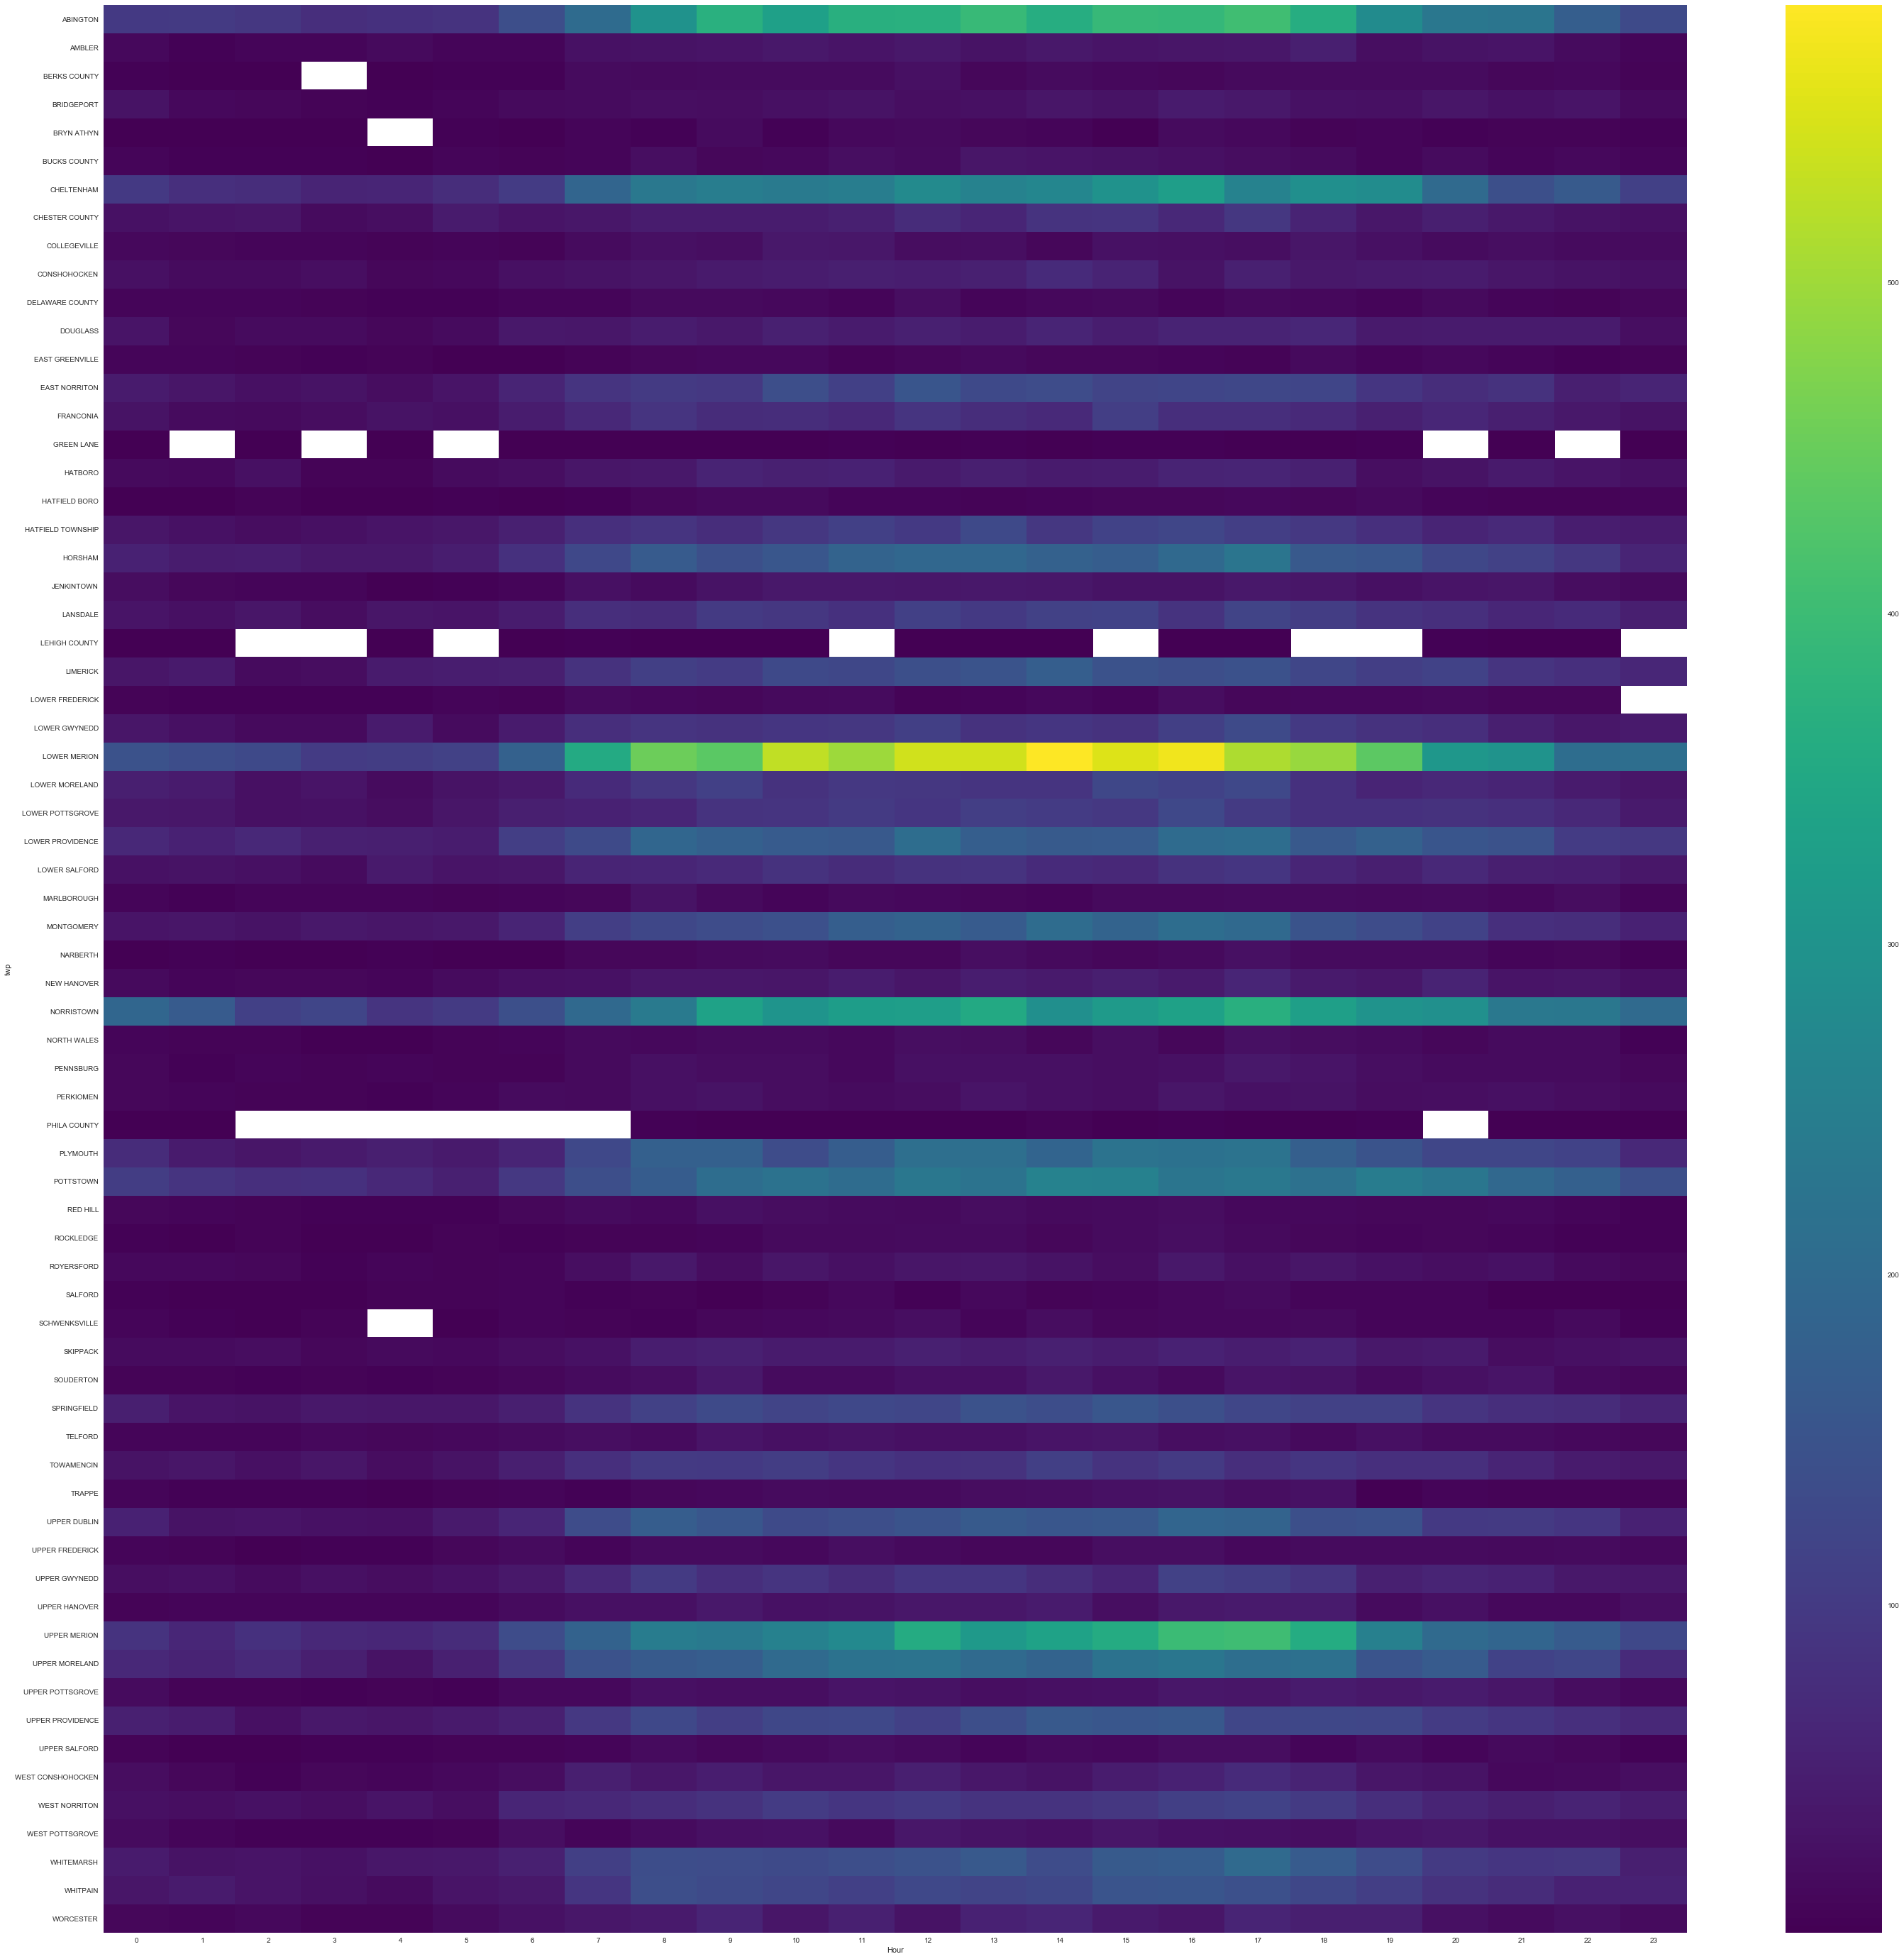

In [49]:
plt.figure(figsize=(50,50))
sns.heatmap(townhour,cmap='viridis')

In [50]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of the week,Date,cause,day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10,BACK PAINS/INJURY,10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10,DIABETIC EMERGENCY,10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10,GAS-ODOR/LEAK,10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10,CARDIAC EMERGENCY,10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10,DIZZINESS,10


In [51]:
df['cause'].value_counts()

 VEHICLE ACCIDENT -              23066
 DISABLED VEHICLE -               7702
 VEHICLE ACCIDENT                 5573
 FIRE ALARM                       5510
 RESPIRATORY EMERGENCY            5112
 CARDIAC EMERGENCY                5012
 FALL VICTIM                      4863
 ROAD OBSTRUCTION -               3144
 SUBJECT IN PAIN                  2687
 HEAD INJURY                      2631
 UNKNOWN MEDICAL EMERGENCY        1874
 SYNCOPAL EPISODE                 1718
 SEIZURES                         1630
 FIRE INVESTIGATION               1478
 GENERAL WEAKNESS                 1464
 ABDOMINAL PAINS                  1436
 ALTERED MENTAL STATUS            1386
 MEDICAL ALERT ALARM              1344
 HEMORRHAGING                     1259
 CVA/STROKE                       1202
 OVERDOSE                         1191
 NAUSEA/VOMITING                  1131
 UNCONSCIOUS SUBJECT              1116
 HAZARDOUS ROAD CONDITIONS -      1086
 GAS-ODOR/LEAK                    1069
 BUILDING FIRE           

In [69]:
df[df['Reason']=='EMS']['cause'].count()

48877

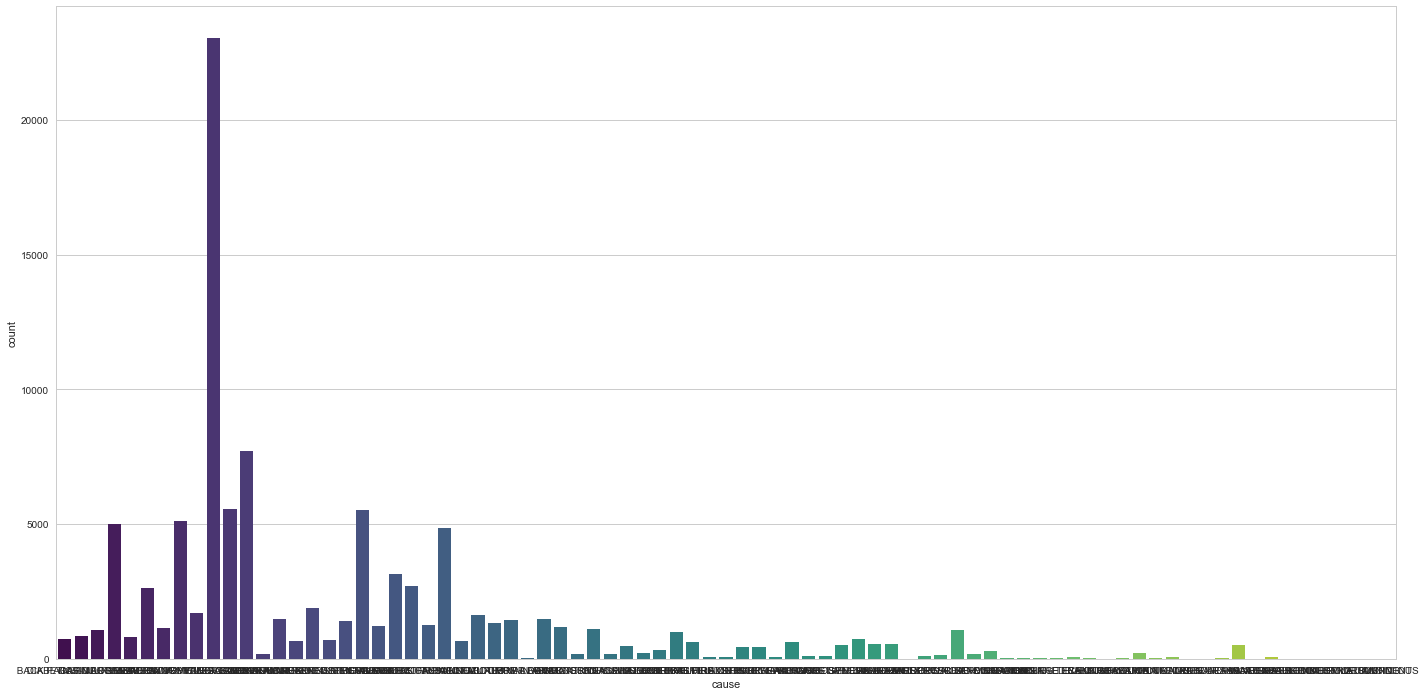

In [70]:
plt.figure(figsize=(24,12))
sns.countplot(x='cause',data=df,palette='viridis',orient=None)

In [54]:
type(df['Reason'].iloc[0])

str

In [55]:
#df['cause'] =df['cause'].astype(str)

In [58]:
type(df['Reason'])

pandas.core.series.Series

In [67]:
df[(df['twp']=='NEW HANOVER') & (df['Reason']=='Fire')]['day'].count()

143